In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
model = MLPClassifier(hidden_layer_sizes=(15,), max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, average='macro')
prec = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<ipython-input-14-6b18b7cd8602>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette="viridis")


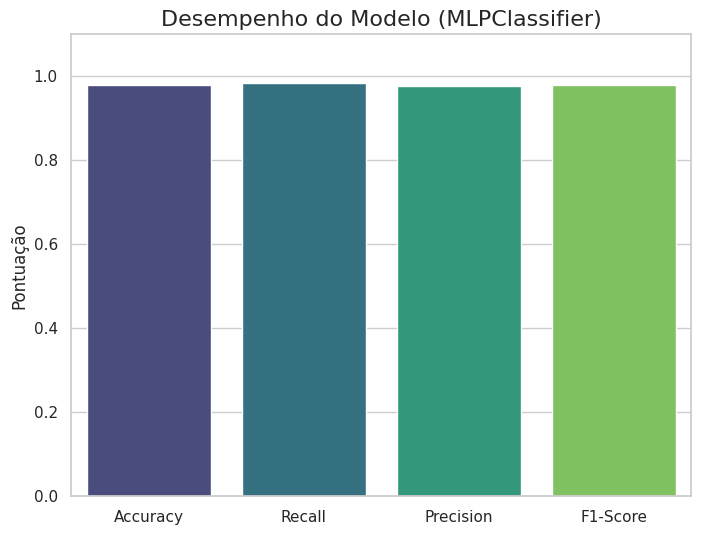

In [14]:
metrics = {'Accuracy': acc, 'Recall': rec, 'Precision': prec, 'F1-Score': f1}
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=metric_names, y=metric_values, palette="viridis")

plt.title("Desempenho do Modelo (MLPClassifier)", fontsize=16)
plt.ylabel("Pontuação", fontsize=12)
plt.ylim(0, 1.1)
plt.show()

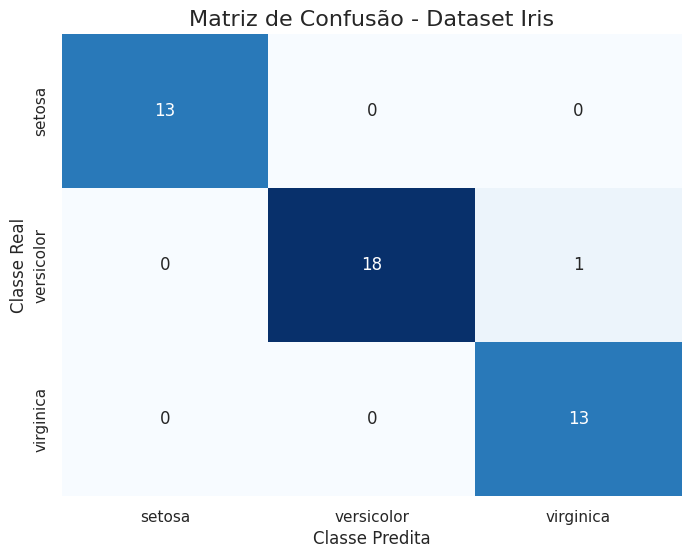

In [15]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
class_names = iris.target_names

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.title("Matriz de Confusão - Dataset Iris", fontsize=16)
plt.xlabel("Classe Predita", fontsize=12)
plt.ylabel("Classe Real", fontsize=12)
plt.show()